in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "2jpz_POH"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [6]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(0.7255, 0.7265, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

rm: cannot remove '#topol.top*': No such file or directory


100%|███████████████████████████████████████████| 51/51 [00:26<00:00,  1.92it/s]


Text(0, 0.5, 'volume')

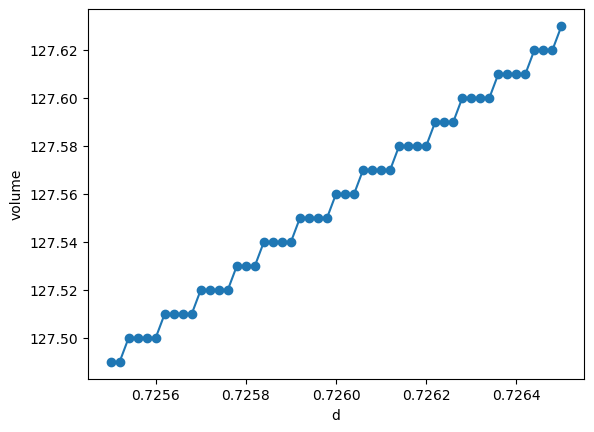

In [7]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3821**

In [8]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(1.25, 1.28, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|███████████████████████████████████████████| 51/51 [00:43<00:00,  1.16it/s]


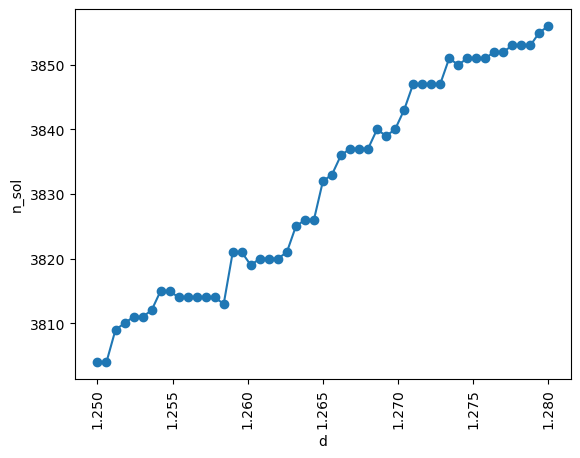

In [9]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [10]:
d2n_sol

{1.25: 3804,
 1.2506: 3804,
 1.2512: 3809,
 1.2518: 3810,
 1.2524: 3811,
 1.253: 3811,
 1.2536: 3812,
 1.2542: 3815,
 1.2548: 3815,
 1.2554: 3814,
 1.256: 3814,
 1.2566: 3814,
 1.2572: 3814,
 1.2578: 3814,
 1.2584: 3813,
 1.259: 3821,
 1.2596: 3821,
 1.2602: 3819,
 1.2608: 3820,
 1.2614: 3820,
 1.262: 3820,
 1.2626: 3821,
 1.2632: 3825,
 1.2638: 3826,
 1.2644: 3826,
 1.265: 3832,
 1.2656: 3833,
 1.2662: 3836,
 1.2668: 3837,
 1.2674: 3837,
 1.268: 3837,
 1.2686: 3840,
 1.2692: 3839,
 1.2698: 3840,
 1.2704: 3843,
 1.271: 3847,
 1.2716: 3847,
 1.2722: 3847,
 1.2728: 3847,
 1.2734: 3851,
 1.274: 3850,
 1.2746: 3851,
 1.2752: 3851,
 1.2758: 3851,
 1.2764: 3852,
 1.277: 3852,
 1.2776: 3853,
 1.2782: 3853,
 1.2788: 3853,
 1.2794: 3855,
 1.28: 3856}